In [1]:
## Machine Learning Online Class
#  Exercise 7 | Principle Component Analysis and K-Means Clustering
#
#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     pca.m
#     projectData.m`
#     recoverData.m
#     computeCentroids.m
#     findClosestCentroids.m
#     kMeansInitCentroids.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
import sys
sys.path.append('../ex3/')
import matplotlib.image as mpimg
from matplotlib import use
use('Agg')
import numpy as np
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from featureNormalize import featureNormalize
from pca import pca
from projectData import projectData
from recoverData import recoverData
from kMeansInitCentroids import kMeansInitCentroids
from runkMeans import runkMeans
from plotDataPoints import plotDataPoints
from displayData import displayData


Visualizing example dataset for PCA.


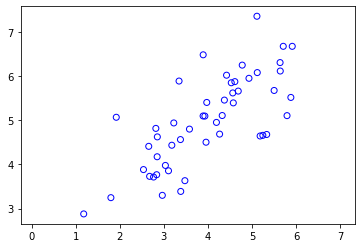

In [2]:
## ================== Part 1: Load Example Dataset  ===================
#  We start this exercise by using a small dataset that is easily to
#  visualize
%matplotlib inline
print ('Visualizing example dataset for PCA.')
#  The following command loads the dataset. You should now have the 
#  variable X in your environment
data = scipy.io.loadmat('ex7data1.mat')
X = data['X']

#  Visualize the example dataset
plt.scatter(X[:, 0], X[:, 1], marker='o', color='b', facecolors='none', lw=1.0)
plt.axis([0.5, 6.5, 2, 8])
plt.axis('equal')
plt.show()

Running PCA on example dataset.


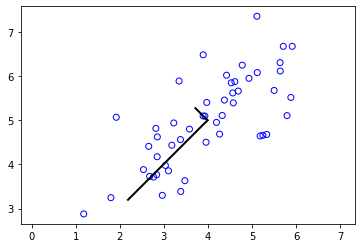

Top eigenvector: 
 U(:,1) = %f %f  -0.7071067811865475 -0.7071067811865477
(you should expect to see -0.707107 -0.707107)


In [3]:

## =============== Part 2: Principal Component Analysis ===============
#  You should now implement PCA, a dimension reduction technique. You
#  should complete the code in pca.m
#
print ('Running PCA on example dataset.')

#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S, V = pca(X_norm)

#  Compute mu, the mean of the each feature

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
# 以数据中心mu为起点，以选取的两向量u为终点绘制突显
# 1.5 表示“线长”
mu2 = 1.5 * S.dot(U.T) + mu  
plt.scatter(X[:, 0], X[:, 1], marker='o', color='b', facecolors='none', lw=1.0)
plt.axis([0.5, 6.5, 2, 8])
plt.axis('equal')
# 最相关的向量的两点分别为（mu[0]，[mu[1]）  （mu2[0, 0]，mu2[0, 1]]）
plt.plot([mu[0], mu2[0, 0]], [mu[1], mu2[0, 1]], '-k', lw=2)
plt.plot([mu[0], mu2[1, 0]], [mu[1], mu2[1, 1]], '-k', lw=2)
plt.show()

print ('Top eigenvector: ')
print (' U(:,1) = %f %f ', U[0,0], U[1,0])
print ('(you should expect to see -0.707107 -0.707107)')


Dimension reduction on example dataset.
Projection of the first example: %f [1.48127391]
(this value should be about 1.481274)
Approximation of the first example: -1.047419 -1.047419
(this value should be about  -1.047419 -1.047419)


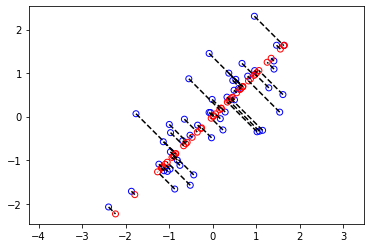

In [4]:
## =================== Part 3: Dimension Reduction ===================
#  You should now implement the projection step to map the data onto the 
#  first k eigenvectors. The code will then plot the data in this reduced 
#  dimensional space.  This will show you what the data looks like when 
#  using only the corresponding eigenvectors to reconstruct it.
#
#  You should complete the code in projectData.m
#
print('Dimension reduction on example dataset.')

#  Plot the normalized dataset (returned from pca)
plt.figure()
plt.scatter(X_norm[:, 0], X_norm[:, 1], marker='o', color='b', facecolors='none', lw=1.0)
plt.axis([-4, 3, -4, 3]) #axis square
plt.axis('equal')
#plt.show()

#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print ('Projection of the first example: %f', Z[0])
print ('(this value should be about 1.481274)')

X_rec  = recoverData(Z, U, K)
print ('Approximation of the first example: %f %f'% (X_rec[0, 0], X_rec[0, 1]))
print ('(this value should be about  -1.047419 -1.047419)')

#  Draw lines connecting the projected points to the original points
plt.scatter(X_rec[:, 0], X_rec[:, 1], marker='o', color='r', facecolor='none', lw=1.0)
for i in range(len(X_norm)):
    plt.plot([X_norm[i, 0], X_rec[i, 0]], [X_norm[i, 1], X_rec[i, 1]], '--k')

plt.show()

Loading face dataset.


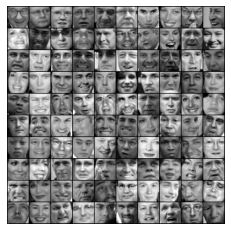

In [5]:
## =============== Part 4: Loading and Visualizing Face Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  The following code will load the dataset into your environment
#
print ('Loading face dataset.')

#  Load Face dataset
data = scipy.io.loadmat('ex7faces.mat')
X = data['X']

#  Display the first 100 faces in the dataset
displayData(X[0:100, :])

Running PCA on face dataset.
(this might take a minute or two ...)




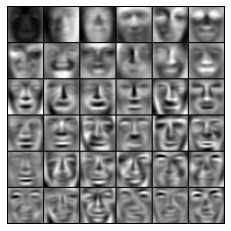

In [6]:
## =========== Part 5: PCA on Face Data: Eigenfaces  ===================
#  Run PCA and visualize the eigenvectors which are in this case eigenfaces
#  We display the first 36 eigenfaces.
#
print ('Running PCA on face dataset.\n(this might take a minute or two ...)\n\n')

#  Before running PCA, it is important to first normalize X by subtracting 
#  the mean value from each feature
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S, V = pca(X_norm)

#  Visualize the top 36 eigenvectors found
displayData(U[:, :36].T)

In [7]:
## ============= Part 6: Dimension Reduction for Faces =================
#  Project images to the eigen space using the top k eigenvectors 
#  If you are applying a machine learning algorithm 
print ('Dimension reduction for face dataset.')

K = 100
Z = projectData(X_norm, U, K)

print ('The projected data Z has a size of: ')
print ('%d %d'% Z.shape)

Dimension reduction for face dataset.
The projected data Z has a size of: 
5000 100


In [8]:
X.shape

(5000, 1024)

Visualizing the projected (reduced dimension) faces.


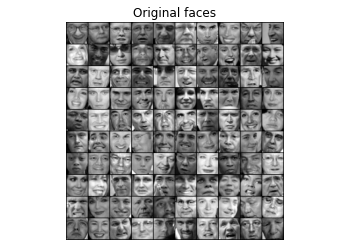

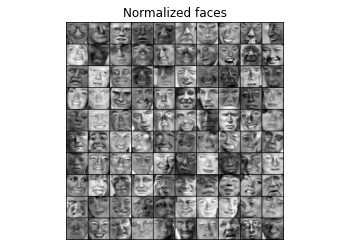

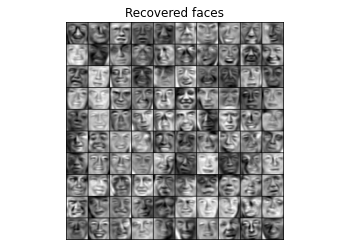

In [9]:
## ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
#  Project images to the eigen space using the top K eigen vectors and 
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed

print ('Visualizing the projected (reduced dimension) faces.')

K = 100
X_rec  = recoverData(Z, U, K)

# Display original data
displayData(X[:100,:])
plt.title('Original faces')
plt.axis('equal')
plt.show()
# Display normalized data
#plt.subplot(1, 2, 1)
displayData(X_norm[:100,:])
plt.title('Normalized faces')
plt.axis('equal')
plt.show()
# Display reconstructed data from only k eigenfaces
#plt.subplot(1, 2, 2)
displayData(X_rec[:100,:])
plt.title('Recovered faces')
plt.axis('equal')
plt.show()

K-Means iteration 0/10...
K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...


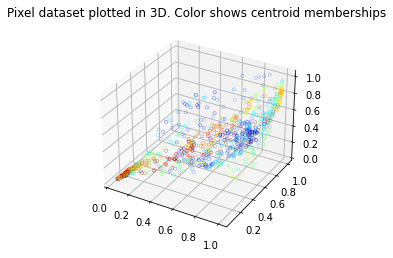

In [10]:
## === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
#  One useful application of PCA is to use it to visualize high-dimensional
#  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
#  pixel colors of an image. We first visualize this output in 3D, and then
#  apply PCA to obtain a visualization in 2D.

# Re-load the image from the previous exercise and run K-Means on it
# For this to work, you need to complete the K-Means assignment first
A = mpimg.imread('bird_small.png')
img_size = A.shape
X = A.reshape(img_size[0] * img_size[1], 3)
K = 16 
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
sel = np.floor(np.random.random(1000) * len(X)) + 1

#  Setup Color Palette

#  Visualize the data and centroid memberships in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Xs = np.array([X[int(s)] for s in sel])
xs = Xs[:, 0]
ys = Xs[:, 1]
zs = Xs[:, 2]
cmap = plt.get_cmap("jet")
#idxn = np.random.random(len(X))
idxn = sel.astype('float')/max(sel.astype('float'))
colors = cmap(idxn)
# ax = Axes3D(fig)
ax.scatter3D(xs, ys, zs=zs, edgecolors=colors, marker='o', facecolors='none', lw=0.4, s=10)

plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show()

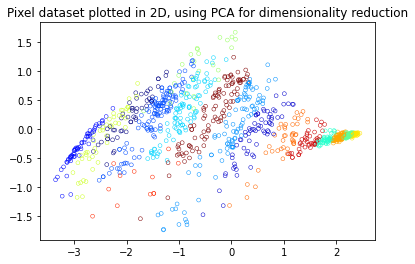

In [11]:
## === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
# Use PCA to project this cloud to 2D for visualization

# Subtract the mean to use PCA
X_norm, mu, sigma = featureNormalize(X)

# PCA and project the data to 2D
U, S, V = pca(X_norm)
Z = projectData(X_norm, U, 2)

# Plot in 2D
plt.figure()
zs = np.array([Z[int(s)] for s in sel])
idxs = np.array([idx[int(s)] for s in sel])

# plt.scatter(zs[:,0], zs[:,1])
plotDataPoints(zs, idxs)
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
plt.show()